<a href="https://colab.research.google.com/github/immohann/Lettuce-Disease/blob/main/Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lettuce Disease Classification
An AI module to detect and classify the disease present in Lettuce plant cultivated in hydroponics. 

In [ ]:
# Importing Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# image preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=40,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

In [ ]:
train_data_dir = "/content/drive/MyDrive/Disease-Detection/data/training"     # directory of training data

test_data_dir = "/content/drive/MyDrive/Disease-Detection/data/validation"      # directory of test data

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255.,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

training_set = train_datagen.flow_from_directory(train_data_dir,
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_data_dir,
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')

print(training_set.class_indices)

Found 1004 images belonging to 3 classes.
Found 275 images belonging to 3 classes.
{'downey': 0, 'powderly': 1, 'septoria': 2}


In [ ]:
# Initializing the CNN
model = Sequential()
model.add(Convolution2D(32, 11, strides = (4, 4), padding = 'valid', input_shape=(224, 224, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model.add(BatchNormalization())
model.add(Convolution2D(64, 11, strides = (1, 1), padding='valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
model.add(BatchNormalization())
model.add(Convolution2D(512, 3, strides = (1, 1), padding='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(Convolution2D(1024, 3, strides = (1, 1), padding='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(Convolution2D(512, 3, strides=(1,1), padding='valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model.add(BatchNormalization())
model.add(Flatten())

# Full Connection Step
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(units = 3, activation = 'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 54, 54, 32)        11648     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 27, 27, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 17, 17, 64)        247872    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 8, 8, 64)          256       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 6, 6, 512)        

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(training_set,
                                   steps_per_epoch=training_set.samples//batch_size,
                                   validation_data=test_set,
                                   epochs=100,
                                   validation_steps=test_set.samples//batch_size,
                    verbose=1)


Epoch 1/100
31/31 [==============================] - 647s 21s/step - loss: 1.4587 - accuracy: 0.4105 - val_loss: 3.4754 - val_accuracy: 0.3789
Epoch 2/100
31/31 [==============================] - 21s 682ms/step - loss: 1.2278 - accuracy: 0.4444 - val_loss: 2.1161 - val_accuracy: 0.4062
Epoch 3/100
31/31 [==============================] - 21s 673ms/step - loss: 1.1744 - accuracy: 0.4568 - val_loss: 1.3199 - val_accuracy: 0.2812
Epoch 4/100
31/31 [==============================] - 21s 679ms/step - loss: 1.1913 - accuracy: 0.4352 - val_loss: 1.3620 - val_accuracy: 0.3633
Epoch 5/100
31/31 [==============================] - 21s 668ms/step - loss: 1.1281 - accuracy: 0.4671 - val_loss: 1.2942 - val_accuracy: 0.4258
Epoch 6/100
31/31 [==============================] - 21s 677ms/step - loss: 1.0989 - accuracy: 0.4619 - val_loss: 1.1281 - val_accuracy: 0.4336
Epoch 7/100
31/31 [==============================] - 21s 680ms/step - loss: 1.0914 - accuracy: 0.5010 - val_loss: 1.2985 - val_accuracy: 

In [ ]:


#saving model
filepath="/content/drive/MyDrive/Disease-Detection/model-1.hdf5"
model.save(filepath)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

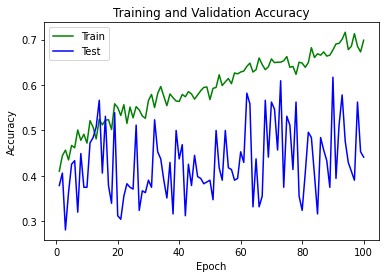

In [ ]:
#accuracy plot
import matplotlib.pyplot as plt

plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

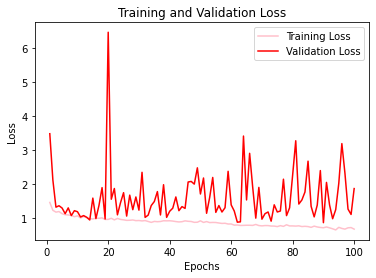

In [ ]:
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Initializing the CNN
model = Sequential()
model.add(Convolution2D(64, 11, strides = (4, 4), padding = 'valid', input_shape=(224, 224, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model.add(BatchNormalization())
model.add(Convolution2D(128, 11, strides = (1, 1), padding='valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
model.add(BatchNormalization())
model.add(Convolution2D(256, 3, strides = (1, 1), padding='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(Convolution2D(512, 3, strides = (1, 1), padding='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(Convolution2D(512, 3, strides=(1,1), padding='valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model.add(BatchNormalization())
model.add(Flatten())

# Full Connection Step
model.add(Dense(units = 1024, activation = 'relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(units = 2048, activation = 'relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(units = 3, activation = 'softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 54, 54, 64)        23296     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 27, 27, 64)        0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 27, 27, 64)        256       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 17, 17, 128)       991360    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 8, 8, 128)         512       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 6, 6, 256)        

In [ ]:
# more layers + dropout + less RMSprop
model.compile(optimizer = 1e-3RMSprop(lr=),
              loss = 'categorical_crossentropy',metrics=['accuracy'])
history = model.fit(training_set,
                                   steps_per_epoch=training_set.samples//batch_size,
                                   validation_data=test_set,
                                   epochs=50,
                                   validation_steps=test_set.samples//batch_size,
                    verbose=1)

Epoch 1/50
31/31 [==============================] - 21s 679ms/step - loss: 1.7270 - accuracy: 0.4115 - val_loss: 5.8309 - val_accuracy: 0.3047
Epoch 2/50
31/31 [==============================] - 20s 659ms/step - loss: 1.4184 - accuracy: 0.4105 - val_loss: 1.5139 - val_accuracy: 0.4766
Epoch 3/50
31/31 [==============================] - 21s 670ms/step - loss: 1.2691 - accuracy: 0.4403 - val_loss: 2.9779 - val_accuracy: 0.4219
Epoch 4/50
31/31 [==============================] - 20s 659ms/step - loss: 1.2603 - accuracy: 0.4270 - val_loss: 2.0029 - val_accuracy: 0.3789
Epoch 5/50
31/31 [==============================] - 21s 675ms/step - loss: 1.1936 - accuracy: 0.4455 - val_loss: 2.4317 - val_accuracy: 0.4375
Epoch 6/50
31/31 [==============================] - 20s 656ms/step - loss: 1.1931 - accuracy: 0.4395 - val_loss: 2.7811 - val_accuracy: 0.3750
Epoch 7/50
31/31 [==============================] - 20s 656ms/step - loss: 1.1878 - accuracy: 0.4342 - val_loss: 2.2705 - val_accuracy: 0.4219

In [ ]:
filepath="/content/drive/MyDrive/Disease-Detection/model-2.hdf5"
model.save(filepath)

In [ ]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

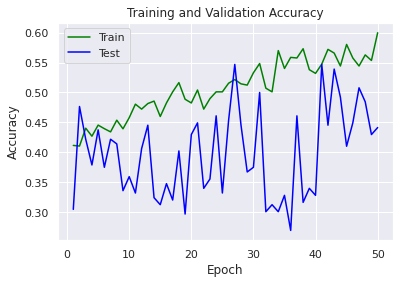

In [ ]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

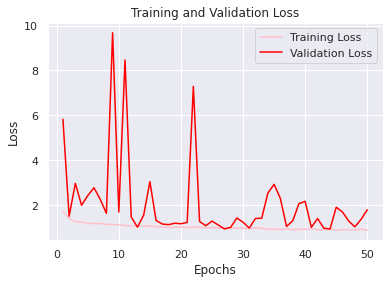

In [ ]:
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Initializing the CNN
model = Sequential()
model.add(Convolution2D(32, 11, strides = (4, 4), padding = 'valid', input_shape=(224, 224, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model.add(BatchNormalization())
model.add(Convolution2D(64, 11, strides = (1, 1), padding='valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
model.add(BatchNormalization())
model.add(Convolution2D(128, 3, strides = (1, 1), padding='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(Convolution2D(512, 3, strides = (1, 1), padding='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(Convolution2D(512, 3, strides=(1,1), padding='valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model.add(BatchNormalization())
model.add(Flatten())

# Full Connection Step
model.add(Dense(units = 2084, activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(units = 1024, activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(units = 3, activation = 'softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 54, 54, 32)        11648     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 27, 27, 32)        0         
_________________________________________________________________
batch_normalization_39 (Batc (None, 27, 27, 32)        128       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 17, 17, 64)        247872    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_40 (Batc (None, 8, 8, 64)          256       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 6, 6, 128)        

In [ ]:
model.compile(optimizer = RMSprop(lr=1e-4),
              loss = 'categorical_crossentropy',metrics=['accuracy'])
history = model.fit(training_set,
                                   steps_per_epoch=training_set.samples//batch_size,
                                   validation_data=test_set,
                                   epochs=150,
                                   validation_steps=test_set.samples//batch_size,
                    verbose=1)

Epoch 1/150
31/31 [==============================] - 21s 671ms/step - loss: 1.0691 - accuracy: 0.5267 - val_loss: 0.9746 - val_accuracy: 0.5430
Epoch 2/150
31/31 [==============================] - 21s 669ms/step - loss: 1.0662 - accuracy: 0.5051 - val_loss: 2.6484 - val_accuracy: 0.3672
Epoch 3/150
31/31 [==============================] - 21s 668ms/step - loss: 1.0621 - accuracy: 0.5422 - val_loss: 1.3177 - val_accuracy: 0.4492
Epoch 4/150
31/31 [==============================] - 21s 669ms/step - loss: 1.0135 - accuracy: 0.5473 - val_loss: 0.9320 - val_accuracy: 0.5938
Epoch 5/150
31/31 [==============================] - 20s 661ms/step - loss: 1.0383 - accuracy: 0.5432 - val_loss: 0.9985 - val_accuracy: 0.5703
Epoch 6/150
31/31 [==============================] - 21s 688ms/step - loss: 1.0227 - accuracy: 0.5216 - val_loss: 1.3176 - val_accuracy: 0.5469
Epoch 7/150
31/31 [==============================] - 21s 677ms/step - loss: 1.0059 - accuracy: 0.5504 - val_loss: 0.9847 - val_accuracy:

In [ ]:
filepath="/content/drive/MyDrive/Disease-Detection/model-3.hdf5"
model.save(filepath)

In [ ]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

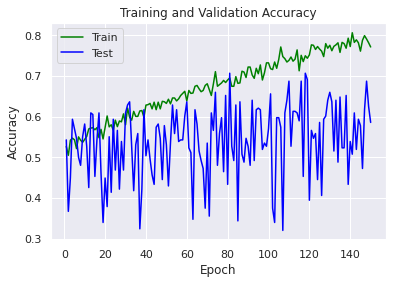

In [ ]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

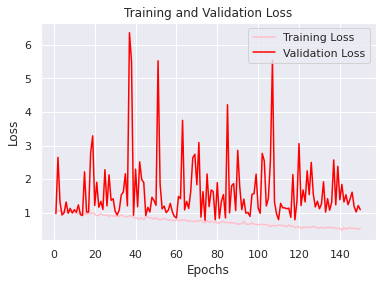

In [ ]:
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Saving images58.jpg to images58 (2).jpg
Saving images71.jpg to images71 (2).jpg
Saving images550.jpg to images550 (2).jpg
Saving images562.jpg to images562 (2).jpg
Saving images631.jpg to images631 (2).jpg
Saving images632.jpg to images632 (2).jpg


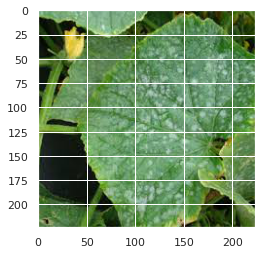

Downy Mildew Disease Detected


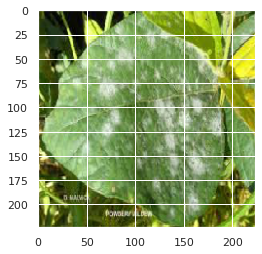

Septoria Disease Detected


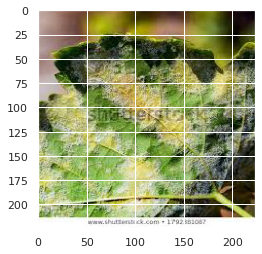

Downy Mildew Disease Detected


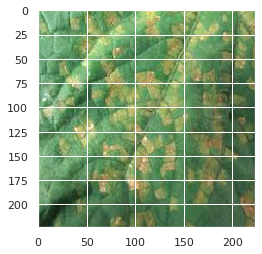

Downy Mildew Disease Detected


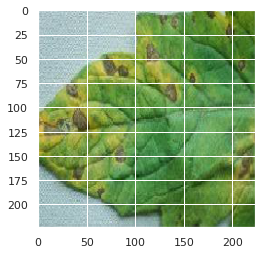

Downy Mildew Disease Detected


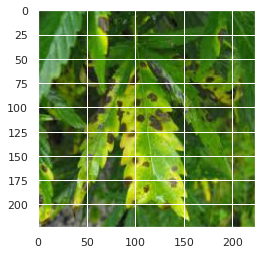

Downy Mildew Disease Detected


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

 
  plt.imshow(img)

  plt.show()

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  for i in classes:
    if classes[0][0]==1:
      print('Downy Mildew Disease Detected')
    elif classes[0][1]==1:
      print('Powdery Mildew Disease Detected')
    elif classes[0][2]==1:
      print('Septoria Disease Detected')

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    #after 6 layers we use flatten to create single vector along with activation function

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),

  #since it's a multi-class hence we'll use softmax activation function.

    tf.keras.layers.Dense(3, activation='softmax')
    ])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 64)       

In [ ]:
model.compile(optimizer = RMSprop(lr=1e-4),
              loss = 'categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(
      training_set,
      steps_per_epoch=training_set.samples//batch_size, 
      epochs=150,
      validation_data=test_set,
      validation_steps=test_set.samples//batch_size,
     verbose=1
      
) 



Epoch 1/150
31/31 [==============================] - 910s 29s/step - loss: 1.0770 - accuracy: 0.3951 - val_loss: 1.0579 - val_accuracy: 0.5195
Epoch 2/150
31/31 [==============================] - 21s 690ms/step - loss: 1.0274 - accuracy: 0.4578 - val_loss: 0.9943 - val_accuracy: 0.5117
Epoch 3/150
31/31 [==============================] - 21s 685ms/step - loss: 0.9906 - accuracy: 0.4990 - val_loss: 0.9678 - val_accuracy: 0.5273
Epoch 4/150
31/31 [==============================] - 21s 677ms/step - loss: 0.9739 - accuracy: 0.5093 - val_loss: 0.9738 - val_accuracy: 0.5312
Epoch 5/150
31/31 [==============================] - 21s 670ms/step - loss: 0.9826 - accuracy: 0.5051 - val_loss: 0.9595 - val_accuracy: 0.5273
Epoch 6/150
31/31 [==============================] - 22s 714ms/step - loss: 0.9741 - accuracy: 0.5021 - val_loss: 0.9831 - val_accuracy: 0.5234
Epoch 7/150
31/31 [==============================] - 22s 695ms/step - loss: 0.9640 - accuracy: 0.5081 - val_loss: 0.9540 - val_accuracy: 

In [ ]:

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

filepath="/content/drive/MyDrive/Disease-Detection/model-gg.hdf5"
model.save(filepath)


Saved model to disk


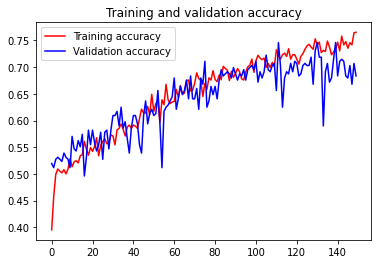

<Figure size 432x288 with 0 Axes>

In [ ]:


# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()



plt.show()

Saving 1572873.jpg to 1572873.jpg
Saving 5393182.jpg to 5393182.jpg
Saving image18.jpeg to image18.jpeg
Saving image27.jpeg to image27.jpeg
Saving images6.jpg to images6.jpg
Saving images18.jpg to images18.jpg


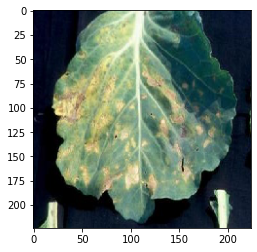

Septoria Disease Detected


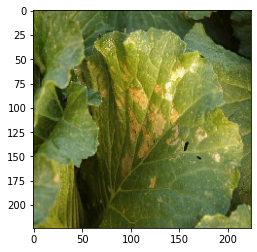

Downy Mildew Disease Detected


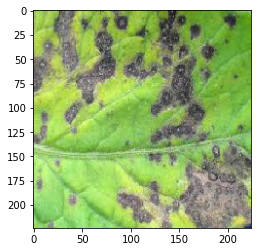

Septoria Disease Detected


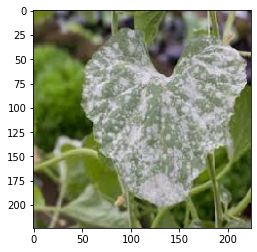

Powdery Mildew Disease Detected


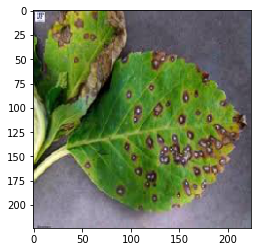

Septoria Disease Detected


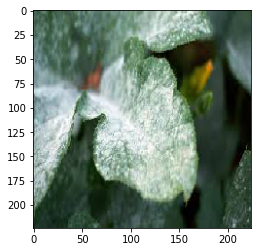

Powdery Mildew Disease Detected


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

 
  plt.imshow(img)

  plt.show()

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  for i in classes:
    if classes[0][0]==1:
      print('Downy Mildew Disease Detected')
    if classes[0][1]==1:
      print('Powdery Mildew Disease Detected')
    if classes[0][2]==1:
      print('Septoria Disease Detected')